# Базовый уровень

*Для получения положительной оценки нужно правильно выполнить не менее 3 заданий из 5*

## Задание 1.1

Загрузите первый лист (`curr`) из файла `data.xlsx` в `pd.DataFrame` (в этой таблице приведены курсы доллара (USD) и евро (EUR) в рублях).

In [15]:
import pandas as pd
df=pd.read_excel('data.xlsx',sheet=0,index='Date')

## Задание 1.2

Выведите на экран тип поля `Date`. Если это `datetime64[ns]` или `<M8[ns]` (по сути то же самое), то мы имеем дело с правильным форматом даты. Если нет, приведите этот столбец к типу `datetime`.

In [32]:
if df['Date'].dtype=='<M8[ns]' or df['Date'].dtype=='datetime64[ns]' :
    print df['Date'].dtype
else:
    pd.to_datetime(df['Date'])
    print df['Date'].dtype

datetime64[ns]


## Задание 1.3

Выведите на экран минимальную и максимальную дату. Сколько всего дней содержится в наших данных? (*Hint: даты можно вычитать друг из друга*)

In [18]:
print df['Date'].dt.date.min()
print df['Date'].dt.date.max()

# если под количеством дней в данных имеется в виду разница максимальной и минимальной даты, то вот:
print (df['Date'].dt.date.max()-df['Date'].dt.date.min())

# если имеется в виду количество уникальных дней, то:
print len(df['Date'].dt.date.unique())

2013-06-22
2017-06-21
1460 days, 0:00:00
988


## Задание 1.4

Постройте на одном графике курс доллара и курс евро.

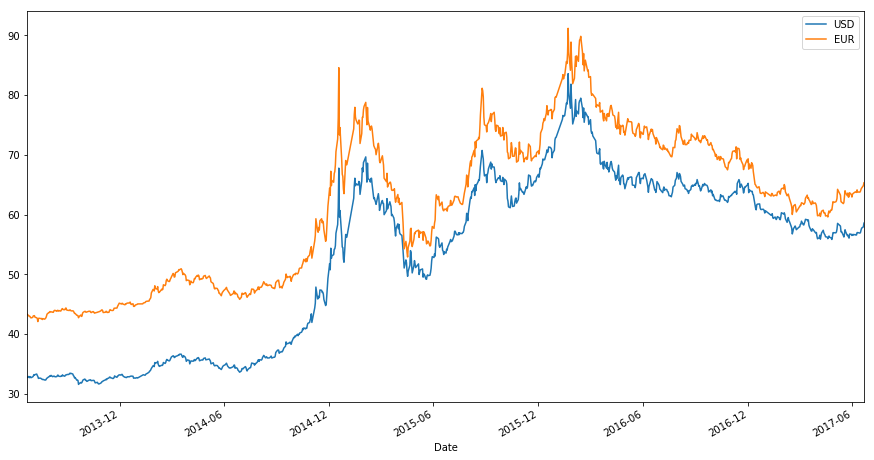

In [19]:
import matplotlib
from matplotlib import pyplot as plt
df.plot(x='Date',figsize=(15,8))
plt.show()

## Задание 1.5

Найдите среднее значение курса евро в мае 2017 года.

In [20]:
import datetime

df.loc[(df['Date'].dt.month==5) & (df['Date'].dt.year==2017)]['EUR'].mean()


62.95527368421053

# Продвинутый уровень

*Для получения положительной оценки нужно правильно выполнить не менее 3 заданий из 5*

## Задание 2.1

Найдите долю дней, когда доллар растет.

In [21]:
from __future__ import division
df.loc[df['USD']-df['USD'].shift(1)>0]['USD'].count()/df['USD'].count()

0.52631578947368418

## Задание 2.2

Постройте гистограмму доходности доллара.

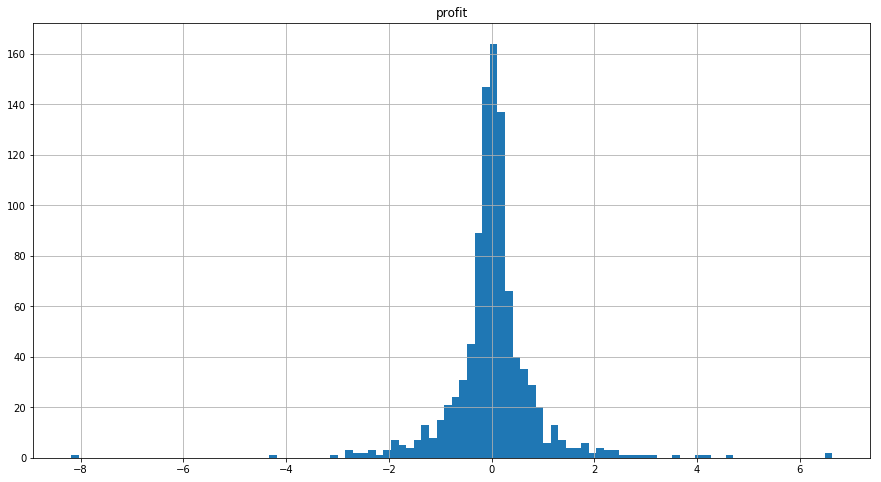

In [22]:
import numpy as np

profit=pd.DataFrame({'profit':df['USD']-df['USD'].shift(1)})

profit.hist(bins=100,figsize=(15,8))
plt.show()


## Задание 2.3

Добавьте в таблицу новую колонку `Weekday` – день недели на русском языке, т.е. строку со значением `u'понедельник'`, `u'вторник'` и т.д. (*Hint: удобно воспользоваться атрибутом* `.dt`)

In [23]:
def rus_weekday(n):
    weekday_dict={0:u'понедельник',1:u'вторник',2:u'среда',3:u'четверг',4:u'пятница',5:u'суббота',6:u'воскресенье'}
    return weekday_dict[n]

df['Weekday']=df['Date'].dt.weekday.apply(rus_weekday)

## Задание 2.4

Рассчитайте корреляцию между курсами доллара и евро за весь доступный период (*Hint: в pandas уже встроена функция для расчета корреляций*).

In [24]:
df['USD'].corr(df['EUR'])

0.98230892515582846

## Задание 2.5

Несколько лет назад курс евро отличался от курса доллара значительно сильнее, чем сейчас. Чтобы это визуализировать, вычислите курс евро к доллару (т.е. "сколько долларов стоит один евро") за каждый день. Постройте график курса евро к доллару за весь доступный период.

# Сложный уровень

*Для получения положительной оценки нужно правильно выполнить не менее 3 заданий из 5*

## Задание 3.1

Загрузите второй лист (`oil`) из файла `data.xlsx` в `pd.DataFrame` (в этой таблице приведены цены за баррель нефти Brent в долларах США).

In [25]:
oil=pd.read_excel('data.xlsx',sheetname=1)

## Задание 3.2

Объедините обе таблицы в одну. Итоговая таблица должна содержать дату в качестве индекса, а также поля `USD` (доллар), `EUR` (евро) и `Brent` (нефть). Обратите внимание, что периоды, за которые доступны данные, немного отличаются для курсов валют и для нефти. Нас интересует только тот период, когда и те, и другие данные присутствуют.

In [26]:
one_table=pd.merge(df,oil,left_on='Date',right_on='dt')

## Задание 3.3

- Постройте на одном графике курсы валют и цены не нефть. Поскольку цена на нефть имеет немного другой масштаб, используйте параметр `secondary_y='Brent'` для отображения дополнительной оси $y$ справа.
- Посчитайте попарные корреляции всех трех временных рядов за весь период.

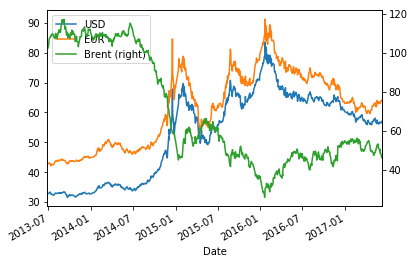

,USD,EUR,Brent
USD,1.000000,0.982142,-0.978950
EUR,0.982142,1.000000,-0.938919
Brent,-0.978950,-0.938919,1.000000


In [31]:
one_table.plot(x='Date',y=['USD','EUR','Brent'],secondary_y='Brent')
plt.show()

one_table[['USD','EUR','Brent']].corr()

## Задание 3.4

Определите, в какие дни недели лучше покупать евро, а в какие – продавать. Для этого рассчитайте среднюю доходность евро в разные дни недели (т.е. нужно сгруппировать таблицу по дням недели и рассчитать среднее процентное изменение курса евро в каждой группе).

In [28]:

one_table['EUR_growth_%']=(one_table['EUR']-one_table['EUR'].shift(1))/one_table['EUR']

one_table.groupby('Weekday')['EUR_growth_%'].mean()


Weekday
вторник    0.002850
пятница   -0.001985
среда      0.000678
четверг    0.000022
Name: EUR_growth_%, dtype: float64

## Задание 3.5

Постройте график "скользящей корреляции" между курсами доллара и евро (таким образом можно найти периоды, когда курсы коррелировали слабее обычного и использовать это для арбитража). Для этого нужно взять скользящее окно (например, 60 последних значений) и рассчитать корреляцию USD - EUR внутри каждого такого окна.